In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [17]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

### Classification

In [18]:
task = "classification" 
datasets = ["openml_43", "openml_361062", "openml_361071", "openml_9978", "openml_361069", "openml_361063"]
combined_df = pd.DataFrame()
for data in datasets:
    ablation_directory =f"/scratch/users/zhongyuan_liang/results_selected_02_25/mdi_local.real_data_{task}_{data}_stability/{data}_stability/varying_sample_row_n"
    split_seeds = [1,2,3]
    sample_seeds = [1,2,3]
    for split_seed in split_seeds:
        for sample_seed in sample_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                print(f"Missing {data} seed {split_seed}_{sample_seed}")
df = combined_df.groupby(['sample_row_n', 'fi', 'data'])[["avg_10_features_all", "avg_20_features_all", "avg_30_features_all", "avg_40_features_all"]].mean().reset_index()

In [19]:
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
    'MDI',
    'LIME_RF',
    'TreeSHAP_RF',
]
color_map = {
    'LIME_RF': '#71BEB7',
    'TreeSHAP_RF': 'orange',
    'MDI': '#9B5DFF',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
}

# data_name = {
#     "openml_43": "Spam",
#     "openml_9946": "Breast Cancer",
#     "openml_9978": "Ozone",
#     "openml_146819": "Climate",
#     "openml_361062": "Pol",
#     "openml_361070": "Eye Movement"
# }

data_name = {
    "openml_43": "Spam",
    "openml_361062": "Pol",
    "openml_361071": "Jannis",
    "openml_9978": "Ozone",
    "openml_361069": "Higgs",
    "openml_361063": "House 16H"
}

methods_name = {
    'LIME_RF': 'LIME',
    'MDI': 'bLoTLA',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA',
}

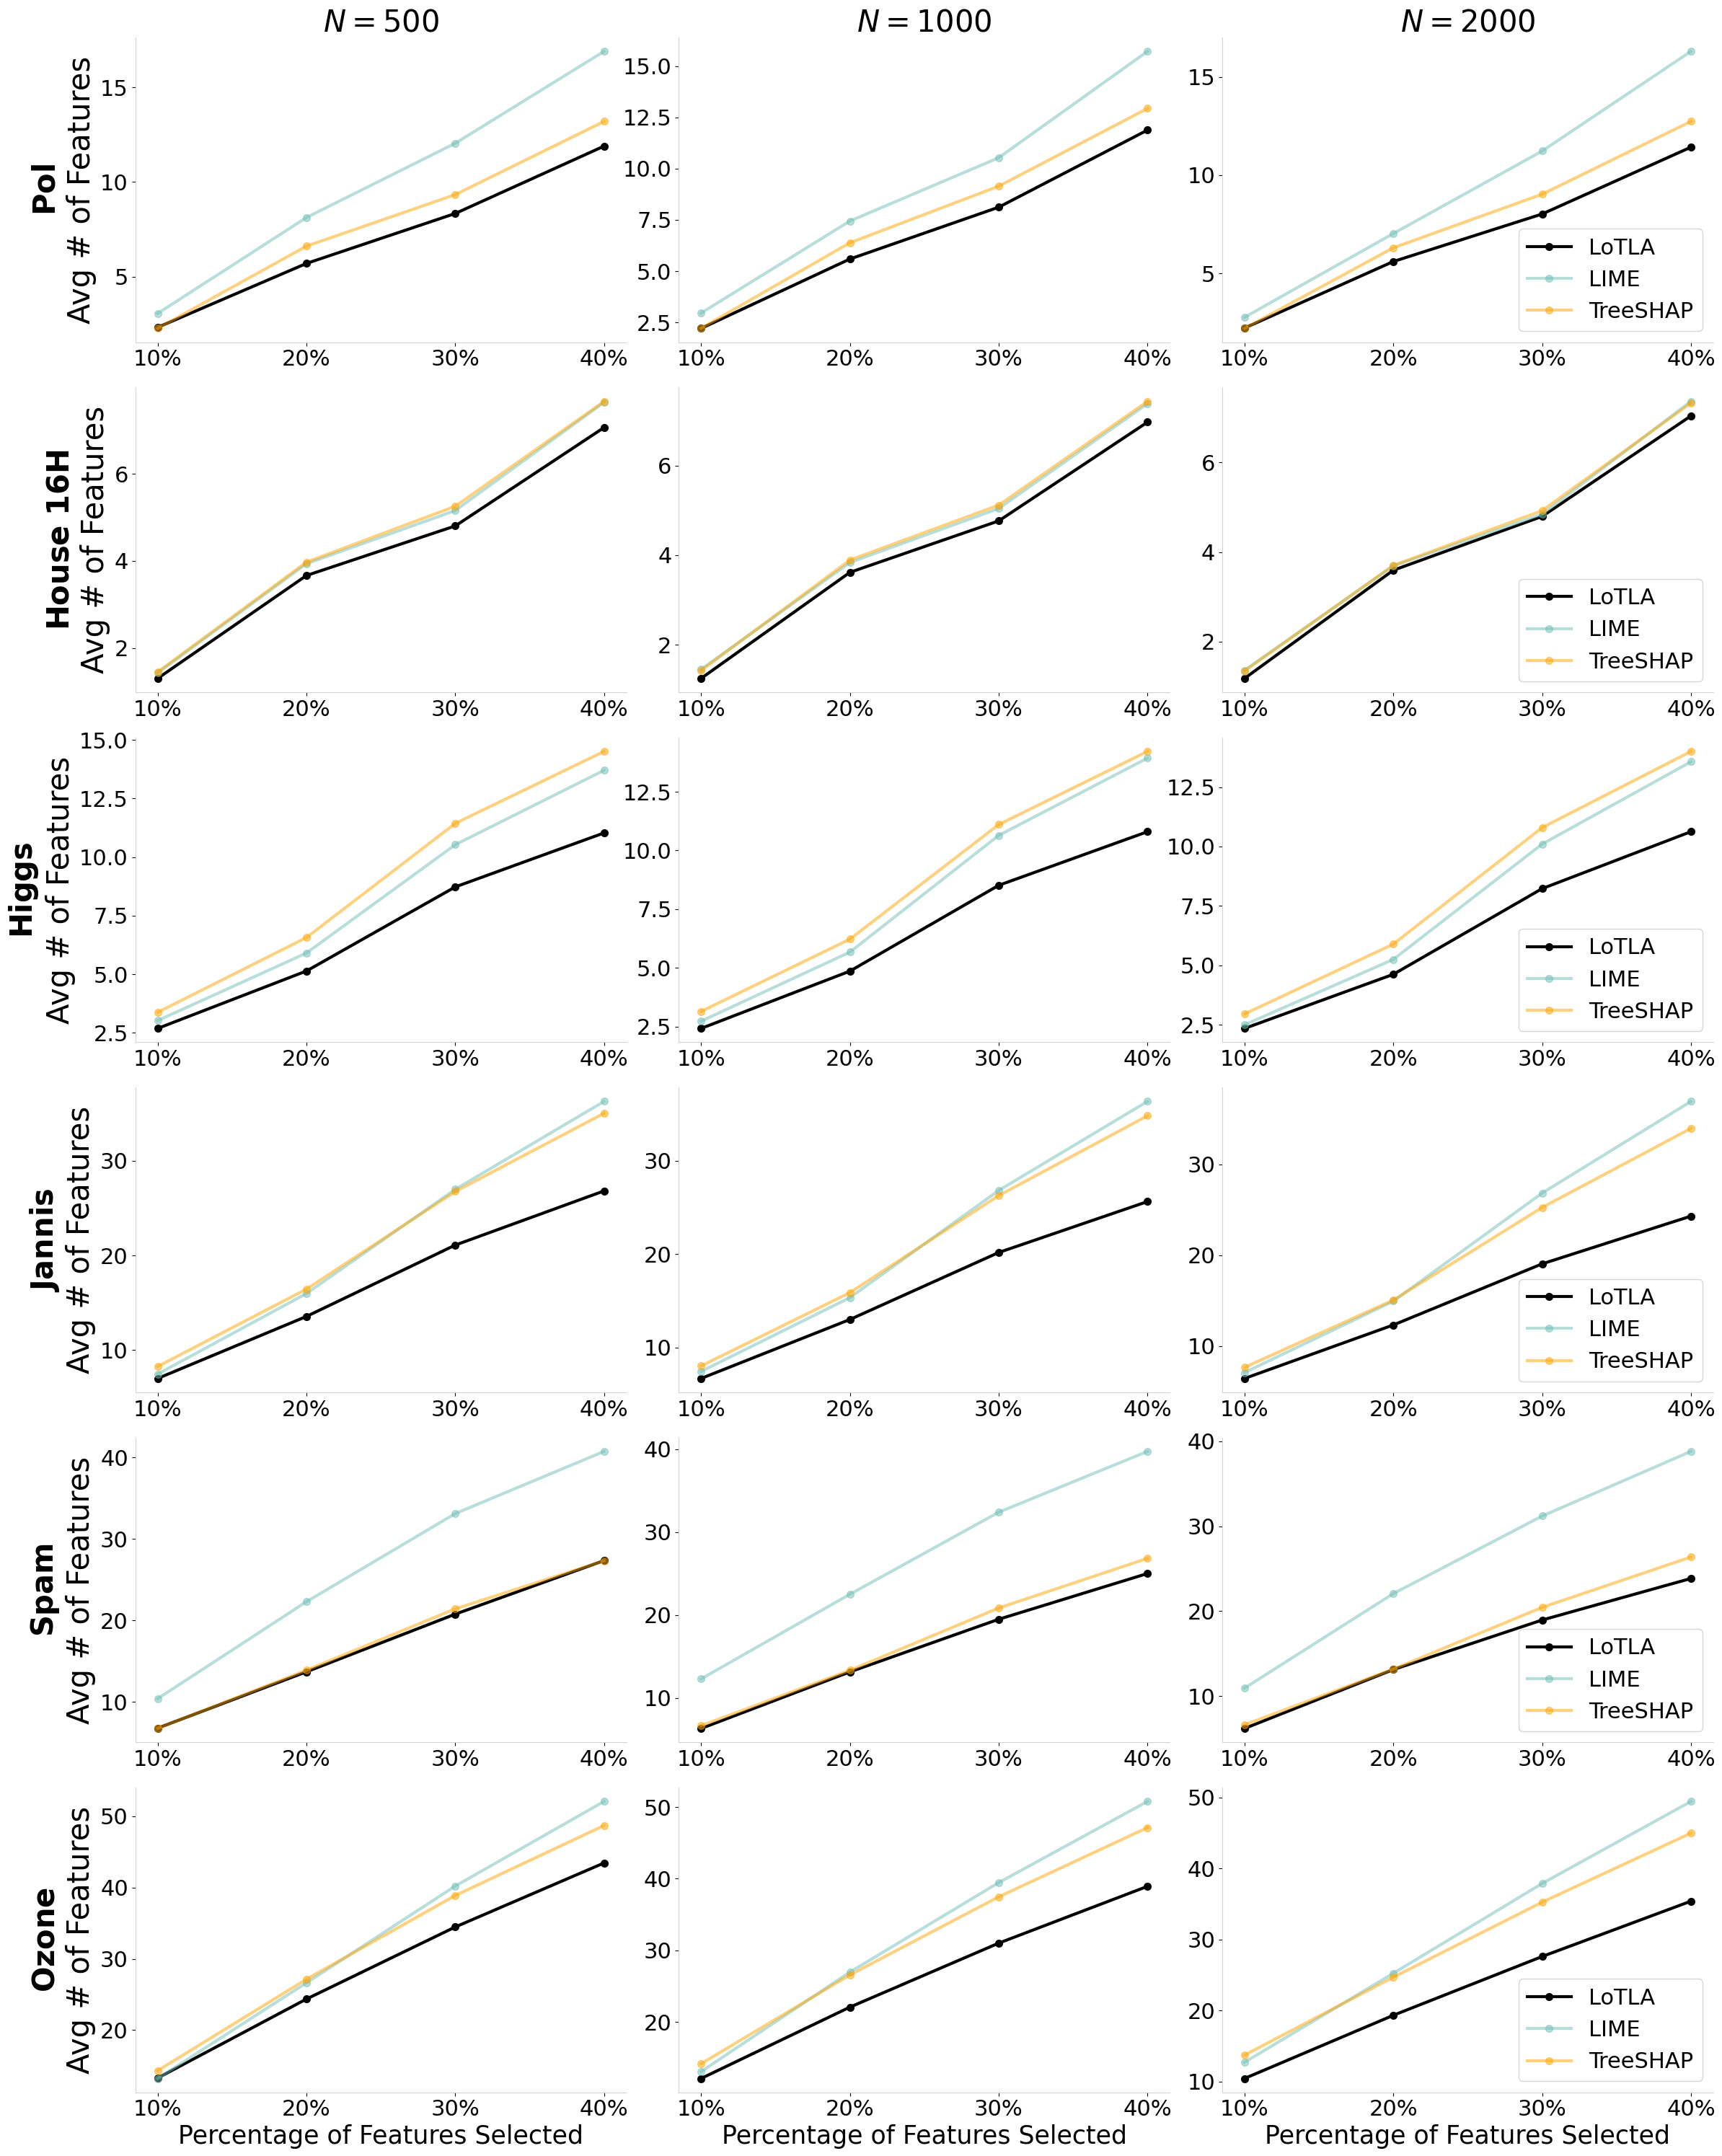

In [ ]:
datasets = df["data"].unique()
sample_size_all = df["sample_row_n"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(sample_size_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, sample_size in enumerate(sample_size_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["sample_row_n"] == sample_size)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    [0.1, 0.2, 0.3, 0.4], method_data[["avg_10_features_all", "avg_20_features_all", "avg_30_features_all", "avg_40_features_all"]].values[0],
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    [0.1, 0.2, 0.3, 0.4], method_data[["avg_10_features_all", "avg_20_features_all", "avg_30_features_all", "avg_40_features_all"]].values[0], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([0.1, 0.2, 0.3, 0.4])
        ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=22)
        ax.tick_params(axis='y', labelsize=22)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Percentage of Features Selected", fontsize=25)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAvg # of Features", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$N = {sample_size}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0.01, 0, 1, 1])
# plt.savefig("stability_classification.png")
plt.show()

### Regression

In [25]:
task = "regression" 
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361259", "openml_361253", "openml_361254", "openml_361242", "openml_361243"]
for data in datasets:
    ablation_directory =f"/scratch/users/zhongyuan_liang/results_selected_02_25/mdi_local.real_data_{task}_{data}_stability/{data}_stability/varying_sample_row_n"
    split_seeds = [1,2,3]
    sample_seeds = [1,2,3,4,5]
    for split_seed in split_seeds:
        for sample_seed in sample_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                print(f"Missing {data} seed {split_seed}_{sample_seed}")
df = combined_df.groupby(['sample_row_n', 'fi', 'data'])[["avg_10_features_all", "avg_20_features_all", "avg_30_features_all", "avg_40_features_all"]].mean().reset_index()

In [26]:
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
    'MDI',
    'LIME_RF',
    'TreeSHAP_RF',
]
color_map = {
    'LIME_RF': '#71BEB7',
    'TreeSHAP_RF': 'orange',
    'MDI': '#9B5DFF',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
}

# data_name = {
#     "openml_361260": "Miami Housing",
#     "openml_361622": "Cars",
#     "openml_361254": "SARCOS",
#     "openml_361259": "Puma Robot",
#     "openml_361253": "Wave Energy",
#     "openml_361242": "Super Conductivitity"
# }

data_name = {
    "openml_361260": "Miami Housing",
    "openml_361259": "Puma Robot",
    "openml_361253": "Wave Energy",
    "openml_361254": "SARCOS",
    "openml_361242": "Super Conductivity",
    "openml_361243": "Geographic Origin of Music"
}


methods_name = {
    'LIME_RF': 'LIME',
    'MDI': 'bLoTLA',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA',
}

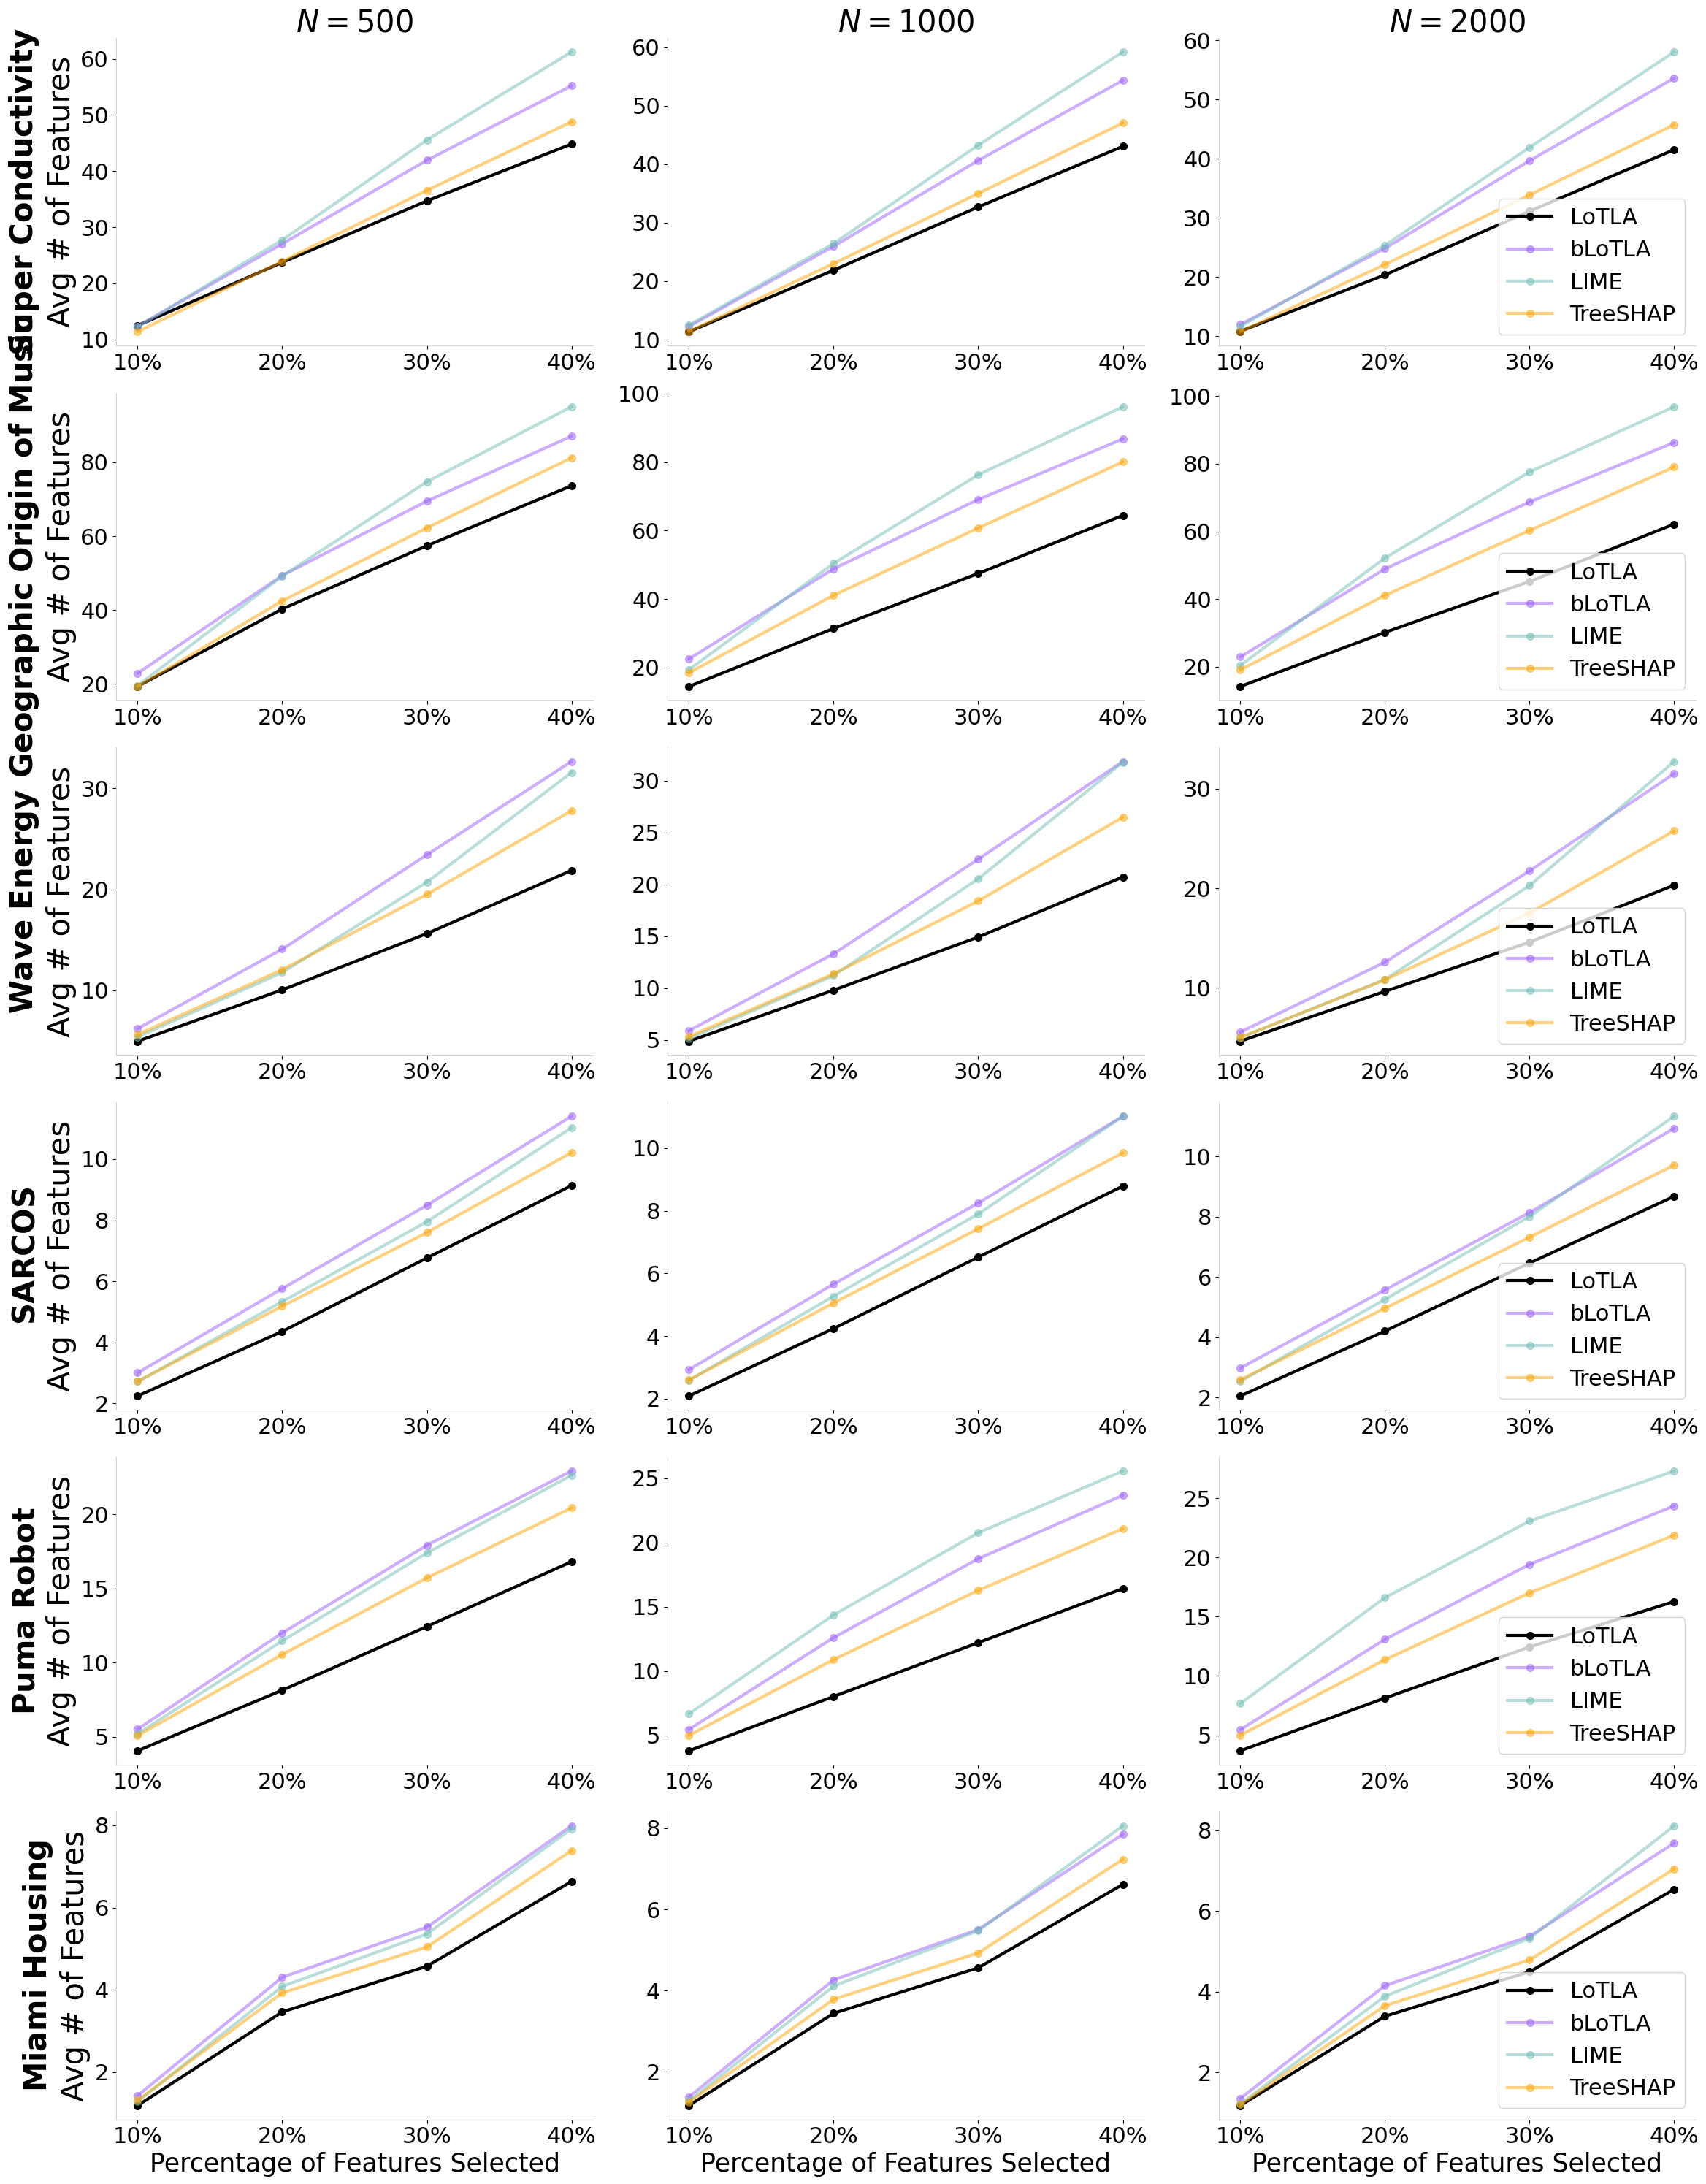

In [27]:
datasets = df["data"].unique()
sample_size_all = df["sample_row_n"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(sample_size_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, sample_size in enumerate(sample_size_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["sample_row_n"] == sample_size)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    [0.1, 0.2, 0.3, 0.4], method_data[["avg_10_features_all", "avg_20_features_all", "avg_30_features_all", "avg_40_features_all"]].values[0],
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    [0.1, 0.2, 0.3, 0.4], method_data[["avg_10_features_all", "avg_20_features_all", "avg_30_features_all", "avg_40_features_all"]].values[0], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([0.1, 0.2, 0.3, 0.4])
        ax.set_xticklabels(["10%", "20%", "30%", "40%"], fontsize=22)
        ax.tick_params(axis='y', labelsize=22)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Percentage of Features Selected", fontsize=25)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAvg # of Features", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$N = {sample_size}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0.01, 0, 1, 1])
# plt.savefig("stability_regression.png")
plt.show()